# Problem Statement:

This is a hackathon published on https://machinehack.com/hackathons/data_hack_mathcothon_car_price_prediction_challenge/overview , organised by Math.co company.
The hackathon named as *Math.co Car Prediction Prediction Challenge* is a machine learning(ML) problem where we have to estimate price for various cars with best features.

- Type of the ML problem: It's a regression problem, since the target variable is continuous in nature.
- Key performance metric(KPI): Root Mean Square Log Error(RMSLE)

# 1. Loading and Reading the data

In [2]:
#import libarries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn import metrics

C:\Users\Princy\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Princy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Princy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
data=pd.read_csv(r"C:\Users\Princy\Downloads\MH_car_prediction_challenge\train.csv")
test_data=pd.read_csv(r"C:\Users\Princy\Downloads\MH_car_prediction_challenge\Test.csv")
sub=pd.read_csv(r"C:\Users\Princy\Downloads\MH_car_prediction_challenge\submission.csv")

In [4]:
#read few lines of the data
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
test_data.head(4)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN


In [5]:
#basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


# 2. Data Cleaning and EDA

In [7]:
#Drop Price column from test data
test_data=test_data.drop('Price', axis=1)

## 2.1 Delete duplicate rows

In [8]:
print("Number of duplicate rows in training data:", data.duplicated().sum())
print("Number of duplicate rows in test data:",test_data.duplicated().sum())

Number of duplicate rows in training data: 313
Number of duplicate rows in test data: 75


In [9]:
#drop duplicate rows from the training dataset
data.drop_duplicates(keep=False, inplace=True)

In [10]:
data.shape

(18704, 18)

## 2.2 Number of unique values in each column

In [11]:
#Number of unique values in each column of the training data
data.nunique()

ID                  18704
Price                2300
Levy                  559
Manufacturer           65
Model                1579
Prod. year             53
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7586
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [12]:
#Number of unique values in each column of the test data
test_data.nunique()

ID                  8170
Levy                 434
Manufacturer          62
Model                995
Prod. year            45
Category              11
Leather interior       2
Fuel type              7
Engine volume         97
Mileage             3978
Cylinders             14
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
dtype: int64

## 2.2 Dealing with null values

In [11]:
print("Number of null value present in train data=", data.isna().sum().sum())
print("Number of null value present in test data=", test_data.isna().sum().sum())

Number of null value present in train data= 0
Number of null value present in test data= 0


- Although it's showing that no null value present in both the datasets but if we look closely we can find that there are blank("-") values present in the "levy" column. So we have to replace them with significant numbers.

In [12]:
#Check % of '-' in Levy which are actually null values
data.loc[data['Levy']=='-'].shape[0]/data.shape[0]

0.3021278870829769

In [13]:
test_data.loc[test_data['Levy']=='-'].shape[0]/test_data.shape[0]

0.2976349302607641

- So there are around 30% null values present in both the datasets.

In [14]:
#Extract numbers from the column and then replace them
data = data.assign(Levy = lambda x: x['Levy'].str.extract('(\d+)'))
test_data = test_data.assign(Levy = lambda x: x['Levy'].str.extract('(\d+)'))

In [15]:
#Change str to float
data['Levy']=(data['Levy']).astype(np.float)
test_data['Levy']=test_data['Levy'].astype(np.float)

In [16]:
#Fill the missing values with mean
data['Levy']= data['Levy'].fillna(data['Levy'].mean())
test_data['Levy']=test_data['Levy'].fillna(data['Levy'].mean())

In [17]:
#Check % of '-' in Levy after replacement
print(data.loc[data['Levy']=='-'].shape[0]/data.shape[0])
print(test_data.loc[test_data['Levy']=='-'].shape[0]/data.shape[0])

0.0
0.0


- So we can see that no null value left.

## 2.3 Removing the outliers

### 2.3.1 Remove outliers with the help of dependent variable

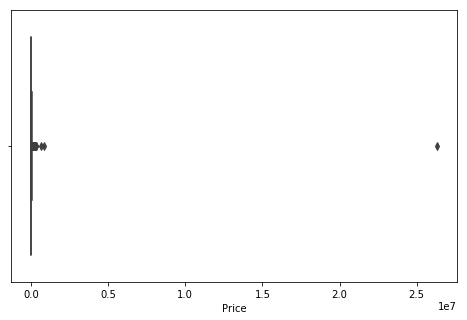

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Price',data=data)

In [19]:
#Check where Price is more than 25000000
data.loc[data['Price']>=25000000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
16983,45812886,26307500,906.247683,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0


- As this Price is too high and not comparable with other values(from the boxplot) we can consider it as an outlier.

In [20]:
#Remove the outlier, using 'Price' data
data=data.loc[data['Price']<25000000]

### 2.3.2 Check for outliers with the help of numerical-independent variables

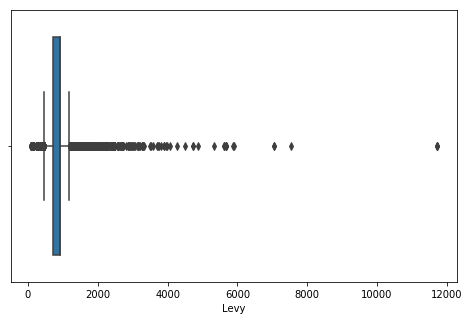

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Levy', data=data)

In [22]:
data.loc[data["Levy"]>10000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
115,45534351,11917,11714.0,MERCEDES-BENZ,E 500 AMG,2003,Sedan,Yes,Petrol,5,150000 km,12.0,Tiptronic,Rear,04-May,Right-hand drive,White,12
18957,44674964,14740,11706.0,MERCEDES-BENZ,E 500 AVG,2005,Sedan,Yes,Petrol,5,56000 km,12.0,Tiptronic,Rear,04-May,Right-hand drive,Black,12
18984,45221191,11917,11714.0,MERCEDES-BENZ,E 500,2003,Sedan,Yes,Petrol,5,150000 km,12.0,Tiptronic,Rear,04-May,Right-hand drive,White,12


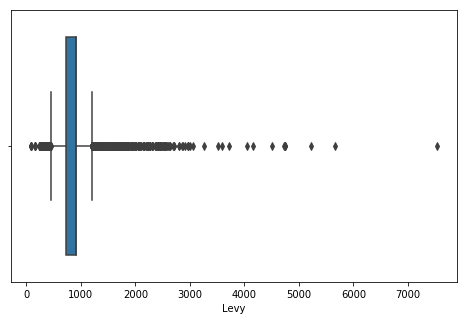

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Levy', data=test_data)

- Since the test data['levy'] is close to train_data['Levy'], we are not removing any traing_Levy.

## 2.4 Deal with the irregularities present in each column

In [24]:
#Replace space with underscore in the Model column
data["Model"]=(data["Model"].str.replace(" ","_"))
test_data["Model"]=test_data["Model"].str.replace(" ","_")

In [38]:
#Replace space with underscore in the Manufacturer column
data["Manufacturer"]=(data["Manufacturer"].str.replace(" ","_"))
data["Manufacturer"]=(data["Manufacturer"].str.replace("-","_"))

test_data["Manufacturer"]=test_data["Manufacturer"].str.replace(" ","_")
data["Manufacturer"]=(data["Manufacturer"].str.replace("-","_"))

In [25]:
data["Mileage"]=data["Mileage"].str.replace("km"," ")
test_data["Mileage"]=test_data["Mileage"].str.replace("km"," ")
data['Mileage']=data['Mileage'].astype(int)
test_data['Mileage']=test_data['Mileage'].astype(int)

In [26]:
#Check percentiles
for i in range(10,110,10):
    k=np.percentile(data['Mileage'],i)
    print("{}th percentile value of sales is {}".format(i,k))

10th percentile value of sales is 25000.0
20th percentile value of sales is 56765.0
30th percentile value of sales is 82471.99999999996
40th percentile value of sales is 106290.4
50th percentile value of sales is 126690.0
60th percentile value of sales is 149045.19999999998
70th percentile value of sales is 174103.0
80th percentile value of sales is 205470.00000000003
90th percentile value of sales is 265843.5999999998
100th percentile value of sales is 2147483647.0


In [27]:
#The difference between 90th and 100th percentile is huge so let's further zoom in there
for i in range(90,101,1):
    k=np.percentile(data['Mileage'],i)
    print("{}th percentile value of sales is {}".format(i,k))

90th percentile value of sales is 265843.5999999998
91th percentile value of sales is 273412.0
92th percentile value of sales is 280000.0
93th percentile value of sales is 293002.1200000001
94th percentile value of sales is 309948.39999999886
95th percentile value of sales is 320554.0
96th percentile value of sales is 350000.0
97th percentile value of sales is 380000.0
98th percentile value of sales is 430146.07999999996
99th percentile value of sales is 565573.0
100th percentile value of sales is 2147483647.0


In [28]:
np.percentile(data['Mileage'],99.99)

2147483647.0

In [29]:
test_data.loc[test_data['Mileage']==2147483647.0]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2608,45794749,906.247683,OPEL,Corsa,1997,Coupe,No,Petrol,1.4,2147483647,4,Manual,Front,02-Mar,Left wheel,Blue,2
4770,45816457,906.247683,TOYOTA,VOXY,2003,Minivan,No,Petrol,0.2,2147483647,4,Automatic,4x4,04-May,Right-hand drive,White,13
5355,45789219,906.247683,HYUNDAI,Sonata,2013,Sedan,Yes,Hybrid,2.4,2147483647,4,Automatic,Front,04-May,Left wheel,Carnelian red,12
7418,45758909,906.247683,VAZ,2106,1988,Sedan,No,Petrol,1.7,2147483647,4,Manual,Rear,04-May,Left wheel,Yellow,0


- As the test_data contains Mileage with greater than 2147483647 unit, we are not removing such values from the train dataset.

In [30]:
#Remove 'Turbo' from Engine volume 
#Change str to float
data["Engine volume"]=(data["Engine volume"].str.replace("Turbo",""))
test_data["Engine volume"]=(test_data["Engine volume"].str.replace("Turbo",""))
data["Engine volume"]=(data["Engine volume"].astype(float))
test_data["Engine volume"]=(test_data["Engine volume"].astype(float))

## 2.5 Simple countplots for categorical features

- Some features which are numerical in nature but number of distinct values in them are really less, we can treat them as categorical features.

Number of unique values in Engine volume= 65


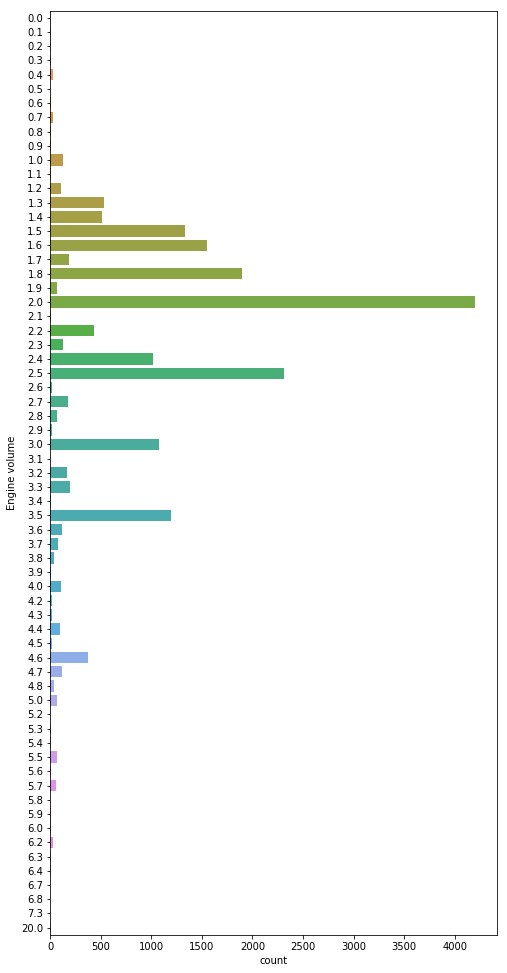

In [33]:
#Engine volume in train data
print("Number of unique values in Engine volume=",len(data['Engine volume'].unique()))
plt.figure(figsize=(8,17))
sns.countplot(y=data['Engine volume'])

Number of unique values in Engine volume= 61


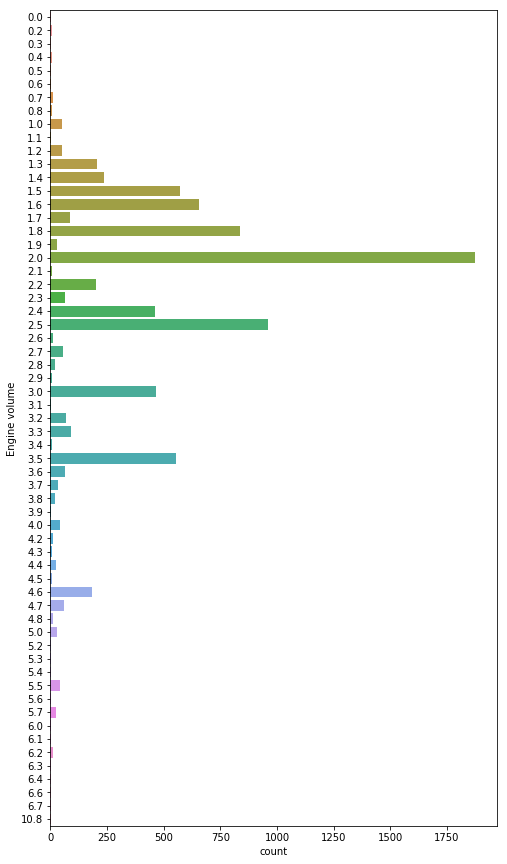

In [34]:
#Engine volume in test data
print("Number of unique values in Engine volume=",len(test_data['Engine volume'].unique()))
plt.figure(figsize=(8,15))
sns.countplot(y=test_data['Engine volume'])

- From the above two plots we can see that Engine volume with value of 2.0 has maximum number of counts, followed by 2.5.
- Some even occure only for once.

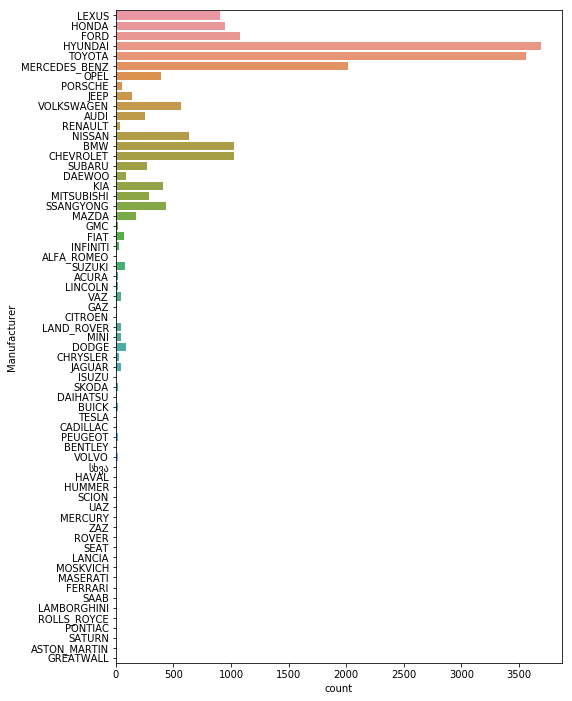

In [39]:
#Manufacturer in train data
plt.figure(figsize=(8,12))
sns.countplot(y=data['Manufacturer'])

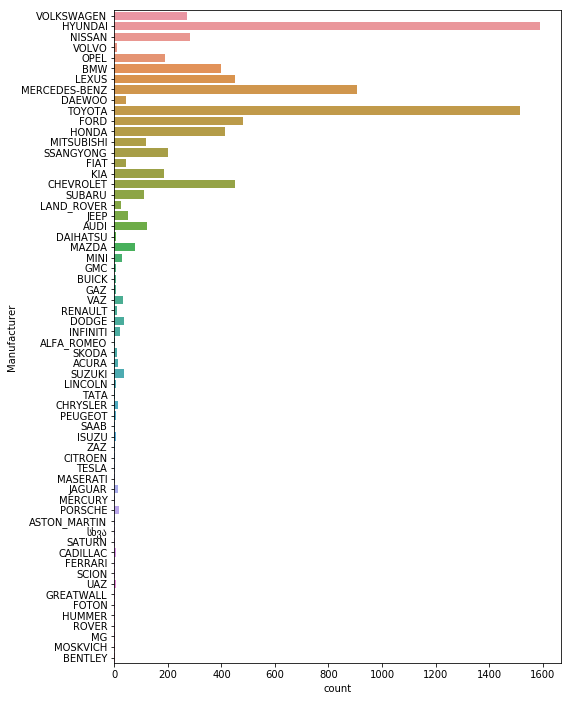

In [40]:
#Manufacturer in test data
plt.figure(figsize=(8,12))
sns.countplot(y=test_data['Manufacturer'])

- The 'Manufacturer' called HYUNDAI made the highest number of cars, followed by TOYOTA and MARCEDES-BENZ.

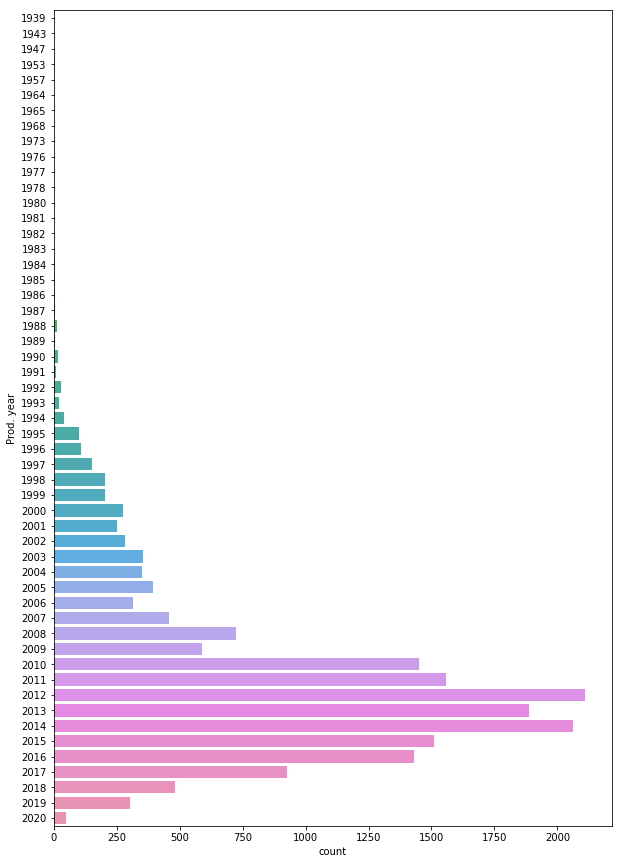

In [41]:
#Production year in train data
plt.figure(figsize=(10,15))
sns.countplot(y=data['Prod. year'])

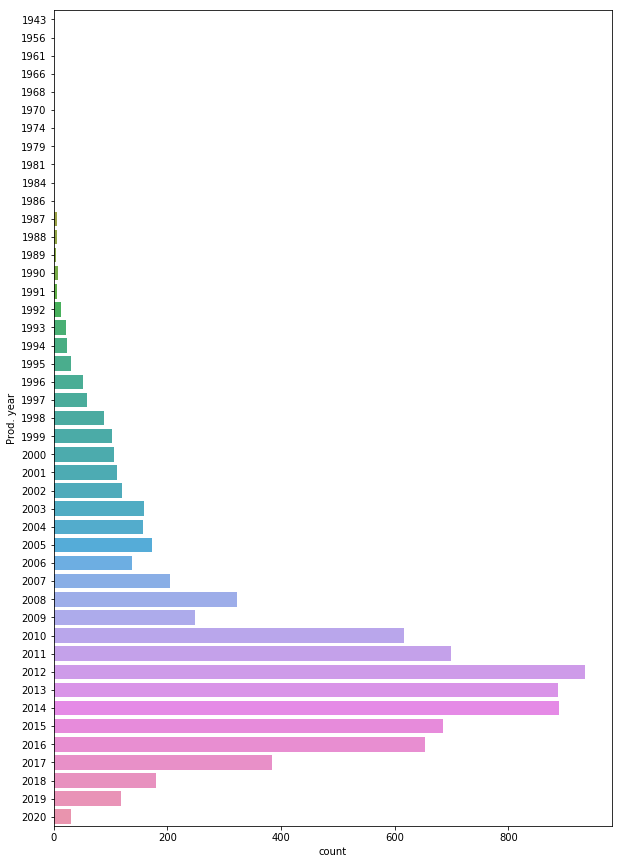

In [43]:
#Production year in test data
plt.figure(figsize=(10,15))
sns.countplot(y=test_data['Prod. year'])

- We can see a nice increasing(mostly) pattern when we look into the number of car production happened from the year 1943 to early 21st century. In the year 2012 it scored to the top. 
- After 2012, there is a decline in production which can be seen clearly. Again it might happen due to less information also.
- Maybe because of covid pandemic in 2020, very less cars produced.

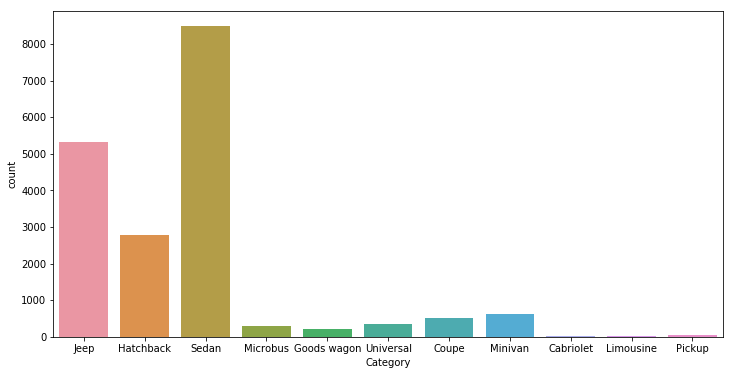

In [39]:
##Category in train data
plt.figure(figsize=(12,6))
sns.countplot(x=data['Category'])

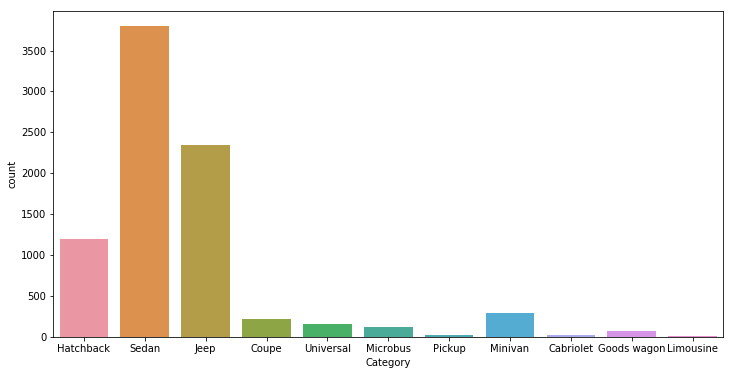

In [40]:
##Category in test data
plt.figure(figsize=(12,6))
sns.countplot(x=test_data['Category'])

- When we see at the category of cars, we find that the Sedan is leading others.

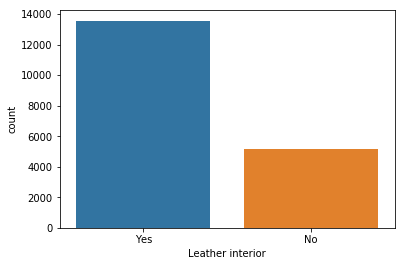

In [41]:
##Leather interior in train data
sns.countplot(x=data['Leather interior'])

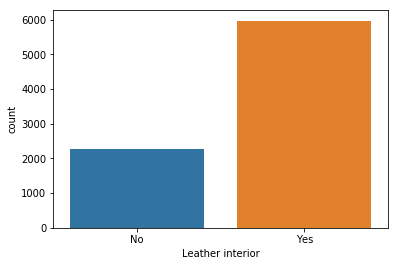

In [42]:
##Leather interior in test data
sns.countplot(x=test_data['Leather interior'])

- Leather interior is present in most cars, probably because custmers prefers them.

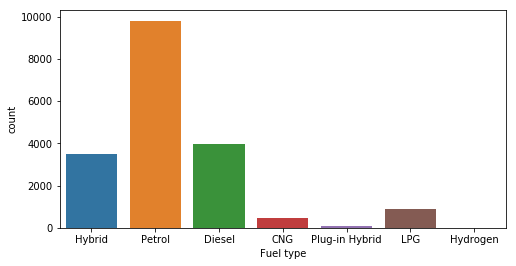

In [43]:
##Fuel type in train data
plt.figure(figsize=(8,4))
sns.countplot(x=data['Fuel type'])

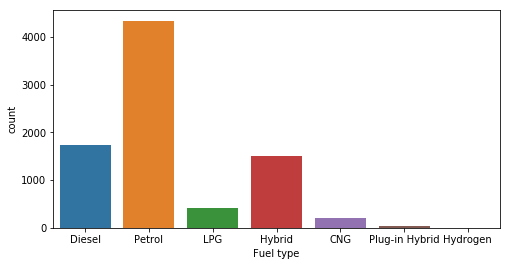

In [44]:
#Fuel type in test data
plt.figure(figsize=(8,4))
sns.countplot(x=test_data['Fuel type'])

- Most cars have petrol engine.
- A very few cars have 'Plug-in Hybrid' engine, which are nothing but elctric cars in simple words.

In [44]:
#Replace irregularities presnt in the column Fuel type
data['Fuel type'].replace(['Plug-in Hybrid'], ['plug_in_hybrid'], inplace=True)
test_data['Fuel type'].replace(['Plug-in Hybrid'], ['plug_in_hybrid'], inplace=True)

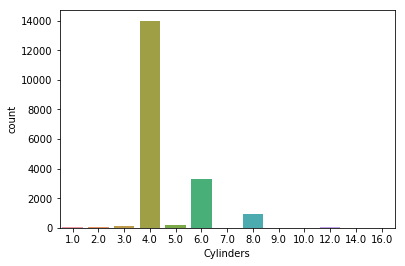

In [45]:
##Cylinders in train data
sns.countplot(x=data['Cylinders'])

- We can see that a car can have as low as one to as many as 16 cylinders.

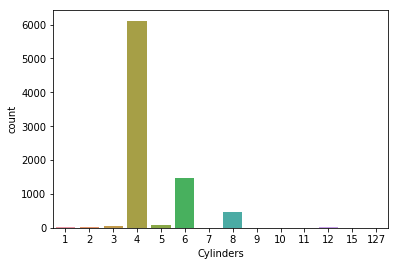

In [46]:
##Cylinders in test data
sns.countplot(x=test_data['Cylinders'])

- Having 127 cylinders in a single car is impossible, so we can say that it's a misinformation.

In [48]:
#For sanity check, let's have a look at the row where it has Cylinders=127
test_data.loc[test_data['Cylinders']==127]

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2689,45792847,702.0,CHEVROLET,Captiva,2014,Jeep,Yes,Diesel,2.2,49643,127,Automatic,Front,04-May,Left wheel,White,4


In [50]:
#Let's replace 127 by 16 using index column
test_data['Cylinders'][2689] = 16

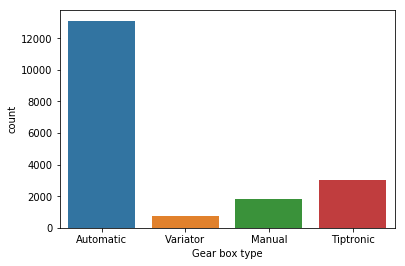

In [54]:
##Gear box type in train data
sns.countplot(x=data['Gear box type'])

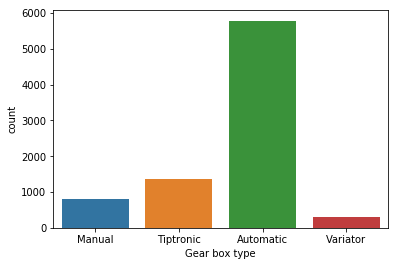

In [55]:
##Gear box type in test data
sns.countplot(x=test_data['Gear box type'])

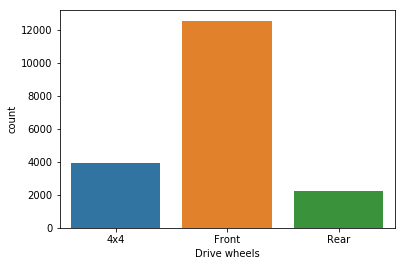

In [50]:
###Drive wheels in train data
sns.countplot(x=data['Drive wheels'])

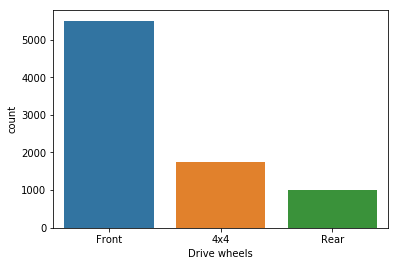

In [51]:
#Drive wheels in test data
sns.countplot(x=test_data['Drive wheels'])

In [56]:
#Replace irregularities presnt in the column Drive wheels
data['Drive wheels'].replace(['Front','4x4', 'Rear'],['front','other', 'rear'],inplace = True)
test_data['Drive wheels'].replace(['Front','4x4', 'Rear'],['front','other', 'rear'],inplace = True)

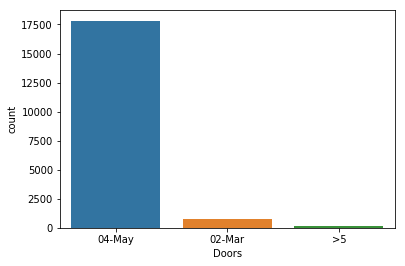

In [57]:
#Doors in train data
sns.countplot(x=data['Doors'])

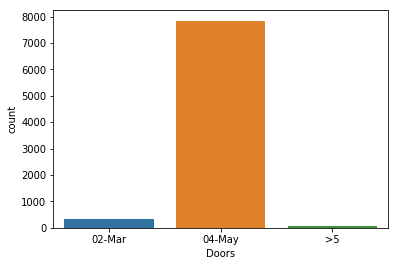

In [58]:
#Doors in test data
sns.countplot(x=test_data['Doors'])

In [59]:
##Replace irregularities presnt in the column Doors
data['Doors'].replace(['02-Mar','04-May', '>5'],[2,4, 5],inplace = True)
test_data['Doors'].replace(['02-Mar','04-May', '>5'],[2, 4, 5],inplace = True)

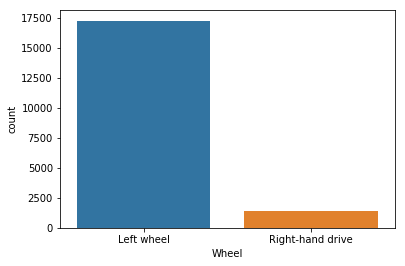

In [56]:
#Wheels in train data
sns.countplot(x=data['Wheel'])

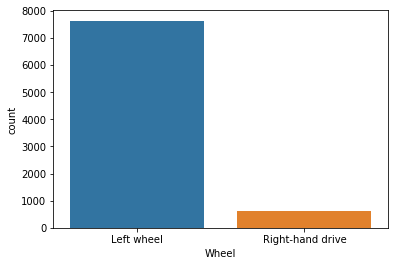

In [57]:
#Wheels in test data
sns.countplot(x=test_data['Wheel'])

In [58]:
#Replace irregularities presnt in the column called Wheels
data['Wheel'].replace(['Left wheel','Right-hand drive'],['left_wheel','right_hand_drive'],inplace = True)
test_data['Wheel'].replace(['Left wheel','Right-hand drive'],['left_wheel','Right_hand_drive'],inplace = True)

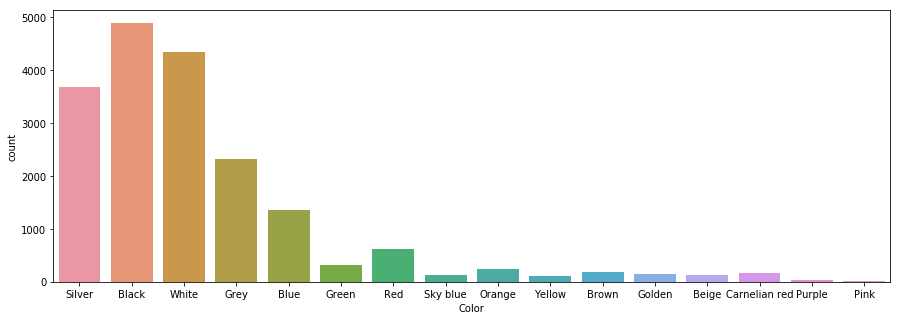

In [60]:
#Colors present in the train data
plt.figure(figsize=(15,5))
sns.countplot(x=data['Color'])

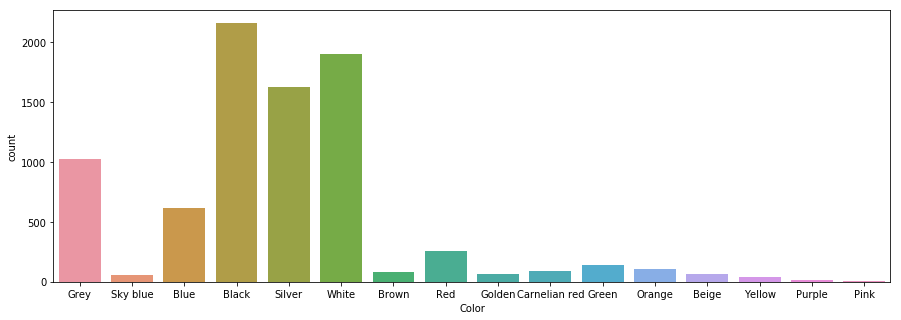

In [61]:
#Colors present in the test data
plt.figure(figsize=(15,5))
sns.countplot(x=test_data['Color'])

- We can see that black, white and silver are the dominating colours where as pink is the most unpopular colour when it comes to cars.

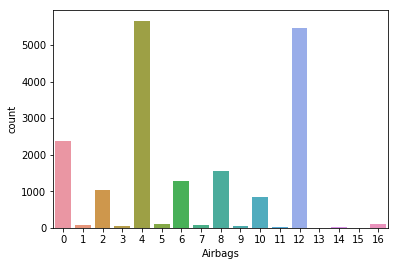

In [61]:
#Airbags present in the test data
sns.countplot(x=data['Airbags'])

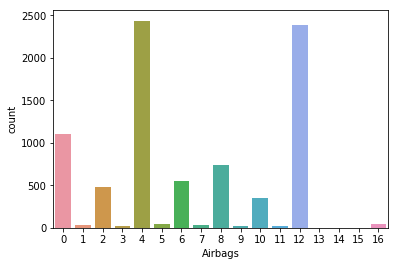

In [62]:
#Airbags present in the test data
sns.countplot(x=test_data['Airbags'])

## 2.6 Heatmap to find the correlation among varibles

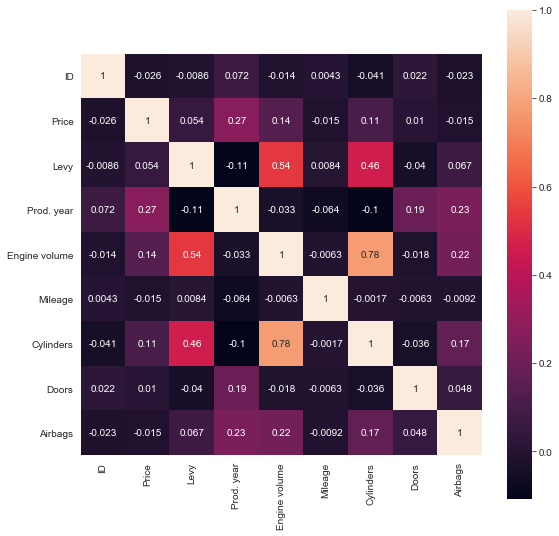

In [62]:
plt.figure(figsize=(9, 9))
sns.set_style("darkgrid")
sns.heatmap(data.corr(), square=True, annot=True)

- We can see that 'Engine volume', 'cylinders' and 'Levy' are correlated but they are important when the target variable viz.'Price' is considered, that's why we are not removing any of these features.

## 2.6 Replace capital words

In [63]:
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=data[col].str.lower()
        test_data[col] = test_data[col].str.lower()

# 3. Train Test split

In [64]:
#remove unusable features
data=data.drop(columns=['ID'], axis=1)
test_data=test_data.drop(columns=['ID'], axis=1)

- To avoid the problem of data leakage, it's really important to split the data before encoding.

In [65]:
#Split the data
y=data['Price'].values
X=data.drop(columns=['Price'], axis=1)
#Split the dataset into train and cv
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, train_size=0.75, random_state=0, shuffle=True)
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((14027, 16), (14027,), (4676, 16), (4676,))

In [66]:
X_test=test_data
test_data.shape

(8245, 16)

# 4. Encoding

# 4.1 Encoding categorical features

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_Manufacturer = vectorizer.fit_transform(X_train['Manufacturer'].values)
X_cv_Manufacturer = vectorizer.transform(X_cv['Manufacturer'].values)
X_test_Manufacturer = vectorizer.transform(X_test['Manufacturer'].values)

print("After vectorizations")
#Print the shape to vaoid confusion
print(X_train_Manufacturer.shape, y_train.shape)
print(X_cv_Manufacturer.shape, y_cv.shape)
print(X_test_Manufacturer.shape)
print(vectorizer.get_feature_names())
print("="*120)

After vectorizations
(14027, 61) (14027,)
(4676, 61) (4676,)
(8245, 61)
['acura', 'alfa_romeo', 'aston_martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'citroen', 'daewoo', 'daihatsu', 'dodge', 'ferrari', 'fiat', 'ford', 'gaz', 'gmc', 'haval', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land_rover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mercedes_benz', 'mercury', 'mini', 'mitsubishi', 'moskvich', 'nissan', 'opel', 'peugeot', 'pontiac', 'porsche', 'renault', 'rolls_royce', 'rover', 'saab', 'scion', 'seat', 'skoda', 'ssangyong', 'subaru', 'suzuki', 'toyota', 'uaz', 'vaz', 'volkswagen', 'volvo', 'zaz', 'სხვა']


In [80]:
vectorizer = CountVectorizer()
X_train_Model = vectorizer.fit_transform(X_train['Model'].values)
X_cv_Model = vectorizer.transform(X_cv['Model'].values)
X_test_Model = vectorizer.transform(X_test['Model'].values)

print("After vectorizations")
print(X_train_Model.shape, y_train.shape)
print(X_cv_Model.shape, y_cv.shape)
print(X_test_Model.shape)
#print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 1288) (14027,)
(4676, 1288) (4676,)
(8245, 1288)


In [81]:
vectorizer = CountVectorizer()
X_train_Category = vectorizer.fit_transform(X_train['Category'].values)
X_cv_Category = vectorizer.transform(X_cv['Category'].values)
X_test_Category = vectorizer.transform(X_test['Category'].values)

print("After vectorizations")
print(X_train_Category.shape, y_train.shape)
print(X_cv_Category.shape, y_cv.shape)
print(X_test_Category.shape)
print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 12) (14027,)
(4676, 12) (4676,)
(8245, 12)
['cabriolet', 'coupe', 'goods', 'hatchback', 'jeep', 'limousine', 'microbus', 'minivan', 'pickup', 'sedan', 'universal', 'wagon']


In [82]:
vectorizer = CountVectorizer()
X_train_Leather_interior = vectorizer.fit_transform(X_train['Leather interior'].values)
X_cv_Leather_interior = vectorizer.transform(X_cv['Leather interior'].values)
X_test_Leather_interior = vectorizer.transform(X_test['Leather interior'].values)

print("After vectorizations")
print(X_train_Leather_interior.shape, y_train.shape)
print(X_cv_Leather_interior.shape, y_cv.shape)
print(X_test_Leather_interior.shape)
print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 2) (14027,)
(4676, 2) (4676,)
(8245, 2)
['no', 'yes']


In [83]:
vectorizer = CountVectorizer()
X_train_Fuel_type = vectorizer.fit_transform(X_train['Fuel type'].values)
X_cv_Fuel_type = vectorizer.transform(X_cv['Fuel type'].values)
X_test_Fuel_type = vectorizer.transform(X_test['Fuel type'].values)

print("After vectorizations")
print(X_train_Fuel_type.shape, y_train.shape)
print(X_cv_Fuel_type.shape, y_cv.shape)
print(X_test_Fuel_type.shape)
print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 7) (14027,)
(4676, 7) (4676,)
(8245, 7)
['cng', 'diesel', 'hybrid', 'hydrogen', 'lpg', 'petrol', 'plug_in_hybrid']


In [84]:
vectorizer = CountVectorizer()
X_train_Gear_box_type = vectorizer.fit_transform(X_train['Gear box type'].values)
X_cv_Gear_box_type = vectorizer.transform(X_cv['Gear box type'].values)
X_test_Gear_box_type = vectorizer.transform(X_test['Gear box type'].values)

print("After vectorizations")
print(X_train_Gear_box_type.shape, y_train.shape)
print(X_cv_Gear_box_type.shape, y_cv.shape)
print(X_test_Gear_box_type.shape)
print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 4) (14027,)
(4676, 4) (4676,)
(8245, 4)
['automatic', 'manual', 'tiptronic', 'variator']


In [85]:
vectorizer = CountVectorizer()
X_train_Drive_wheels = vectorizer.fit_transform(X_train['Drive wheels'].values)
X_cv_Drive_wheels = vectorizer.transform(X_cv['Drive wheels'].values)
X_test_Drive_wheels = vectorizer.transform(X_test['Drive wheels'].values)

print("After vectorizations")
print(X_train_Drive_wheels.shape, y_train.shape)
print(X_cv_Drive_wheels.shape, y_cv.shape)
print(X_test_Drive_wheels.shape)
print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 3) (14027,)
(4676, 3) (4676,)
(8245, 3)
['front', 'other', 'rear']


In [86]:
vectorizer = CountVectorizer()
X_train_Wheel = vectorizer.fit_transform(X_train['Wheel'].values)
X_cv_Wheel = vectorizer.transform(X_cv['Wheel'].values)
X_test_Wheel = vectorizer.transform(X_test['Wheel'].values)

print("After vectorizations")
print(X_train_Wheel.shape, y_train.shape)
print(X_cv_Wheel.shape, y_cv.shape)
print(X_test_Wheel.shape)
print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 5) (14027,)
(4676, 5) (4676,)
(8245, 5)
['drive', 'hand', 'left', 'right', 'wheel']


In [87]:
vectorizer = CountVectorizer()
X_train_Color = vectorizer.fit_transform(X_train['Color'].values)
X_cv_Color = vectorizer.transform(X_cv['Color'].values)
X_test_Color = vectorizer.transform(X_test['Color'].values)

print("After vectorizations")
print(X_train_Color.shape, y_train.shape)
print(X_cv_Color.shape, y_cv.shape)
print(X_test_Color.shape)
print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 16) (14027,)
(4676, 16) (4676,)
(8245, 16)
['beige', 'black', 'blue', 'brown', 'carnelian', 'golden', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'sky', 'white', 'yellow']


# 4.2 Encoding numerical features

- There are some numerical features which has very less number of unique values, so they can be considered as categorical  features like Engine volume, Prod. year, Cylinders etc.

In [89]:
from sklearn.preprocessing import OneHotEncoder
vectorizer =OneHotEncoder(handle_unknown='ignore')

vectorizer.fit(data['Engine volume'].values.reshape(-1,1))
X_train_Engine_volume = vectorizer.transform(X_train['Engine volume'].values.reshape(-1,1))
X_cv_Engine_volume = vectorizer.transform(X_cv['Engine volume'].values.reshape(-1,1))
X_test_Engine_volume = vectorizer.transform(X_test['Engine volume'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Engine_volume.shape, y_train.shape)
print(X_cv_Engine_volume.shape, y_cv.shape)
print(X_test_Engine_volume.shape)
print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 65) (14027,)
(4676, 65) (4676,)
(8245, 65)
['x0_0.0' 'x0_0.1' 'x0_0.2' 'x0_0.3' 'x0_0.4' 'x0_0.5' 'x0_0.6' 'x0_0.7'
 'x0_0.8' 'x0_0.9' 'x0_1.0' 'x0_1.1' 'x0_1.2' 'x0_1.3' 'x0_1.4' 'x0_1.5'
 'x0_1.6' 'x0_1.7' 'x0_1.8' 'x0_1.9' 'x0_2.0' 'x0_2.1' 'x0_2.2' 'x0_2.3'
 'x0_2.4' 'x0_2.5' 'x0_2.6' 'x0_2.7' 'x0_2.8' 'x0_2.9' 'x0_3.0' 'x0_3.1'
 'x0_3.2' 'x0_3.3' 'x0_3.4' 'x0_3.5' 'x0_3.6' 'x0_3.7' 'x0_3.8' 'x0_3.9'
 'x0_4.0' 'x0_4.2' 'x0_4.3' 'x0_4.4' 'x0_4.5' 'x0_4.6' 'x0_4.7' 'x0_4.8'
 'x0_5.0' 'x0_5.2' 'x0_5.3' 'x0_5.4' 'x0_5.5' 'x0_5.6' 'x0_5.7' 'x0_5.8'
 'x0_5.9' 'x0_6.0' 'x0_6.2' 'x0_6.3' 'x0_6.4' 'x0_6.7' 'x0_6.8' 'x0_7.3'
 'x0_20.0']


In [91]:
vectorizer =OneHotEncoder(handle_unknown='ignore')

vectorizer.fit(data['Prod. year'].values.reshape(-1,1))
X_train_Prod_year = vectorizer.transform(X_train['Prod. year'].values.reshape(-1,1))
X_cv_Prod_year = vectorizer.transform(X_cv['Prod. year'].values.reshape(-1,1))
X_test_Prod_year = vectorizer.transform(X_test['Prod. year'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Prod_year.shape, y_train.shape)
print(X_cv_Prod_year.shape, y_cv.shape)
print(X_test_Prod_year.shape)
print(vectorizer.get_feature_names())
print("="*126)

After vectorizations
(14027, 53) (14027,)
(4676, 53) (4676,)
(8245, 53)
['x0_1939' 'x0_1943' 'x0_1947' 'x0_1953' 'x0_1957' 'x0_1964' 'x0_1965'
 'x0_1968' 'x0_1973' 'x0_1976' 'x0_1977' 'x0_1978' 'x0_1980' 'x0_1981'
 'x0_1982' 'x0_1983' 'x0_1984' 'x0_1985' 'x0_1986' 'x0_1987' 'x0_1988'
 'x0_1989' 'x0_1990' 'x0_1991' 'x0_1992' 'x0_1993' 'x0_1994' 'x0_1995'
 'x0_1996' 'x0_1997' 'x0_1998' 'x0_1999' 'x0_2000' 'x0_2001' 'x0_2002'
 'x0_2003' 'x0_2004' 'x0_2005' 'x0_2006' 'x0_2007' 'x0_2008' 'x0_2009'
 'x0_2010' 'x0_2011' 'x0_2012' 'x0_2013' 'x0_2014' 'x0_2015' 'x0_2016'
 'x0_2017' 'x0_2018' 'x0_2019' 'x0_2020']


In [92]:
vectorizer = OneHotEncoder(handle_unknown='ignore')

X_train_Cylinders = vectorizer.fit_transform(X_train['Cylinders'].values.reshape(-1,1))
X_cv_Cylinders = vectorizer.transform(X_cv['Cylinders'].values.reshape(-1,1))
X_test_Cylinders = vectorizer.transform(X_test['Cylinders'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Cylinders.shape, y_train.shape)
print(X_cv_Cylinders.shape, y_cv.shape)
print(X_test_Cylinders.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(14027, 13) (14027,)
(4676, 13) (4676,)
(8245, 13)
['x0_1.0' 'x0_2.0' 'x0_3.0' 'x0_4.0' 'x0_5.0' 'x0_6.0' 'x0_7.0' 'x0_8.0'
 'x0_9.0' 'x0_10.0' 'x0_12.0' 'x0_14.0' 'x0_16.0']


In [98]:
from sklearn.preprocessing import OrdinalEncoder
vectorizer = OrdinalEncoder()
# we use the fitted CountVectorizer to convert the text to vector
X_train_Doors = vectorizer.fit_transform(X_train['Doors'].values.reshape(-1,1))
X_cv_Doors = vectorizer.transform(X_cv['Doors'].values.reshape(-1,1))
X_test_Doors = vectorizer.transform(X_test['Doors'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Doors.shape, y_train.shape)
print(X_cv_Doors.shape, y_cv.shape)
print(X_test_Doors.shape)
print("="*100)

After vectorizations
(14027, 1) (14027,)
(4676, 1) (4676,)
(8245, 1)


In [94]:
from sklearn.preprocessing import OrdinalEncoder

vectorizer = OrdinalEncoder()
# we use the fitted CountVectorizer to convert the text to vector
X_train_Airbags = vectorizer.fit_transform(X_train['Airbags'].values.reshape(-1,1))
X_cv_Airbags = vectorizer.transform(X_cv['Airbags'].values.reshape(-1,1))
X_test_Airbags = vectorizer.transform(X_test['Airbags'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Airbags.shape, y_train.shape)
print(X_cv_Airbags.shape, y_cv.shape)
print(X_test_Airbags.shape)
print("="*100)

After vectorizations
(14027, 1) (14027,)
(4676, 1) (4676,)
(8245, 1)


In [95]:
#Normalize actual numerical features
from sklearn.preprocessing import Normalizer
vectorizer = Normalizer()
# we use the fitted CountVectorizer to convert the text to vector
X_train_Levy = vectorizer.fit_transform(X_train['Levy'].values.reshape(-1,1))
X_cv_Levy = vectorizer.transform(X_cv['Levy'].values.reshape(-1,1))
X_test_Levy = vectorizer.transform(X_test['Levy'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Levy.shape, y_train.shape)
print(X_cv_Levy.shape, y_cv.shape)
print(X_test_Levy.shape)
print("="*100)

After vectorizations
(14027, 1) (14027,)
(4676, 1) (4676,)
(8245, 1)


In [99]:
from sklearn.preprocessing import Normalizer
vectorizer = Normalizer()
# we use the fitted CountVectorizer to convert the text to vector
X_train_Mileage = vectorizer.fit_transform(X_train['Mileage'].values.reshape(-1,1))
X_cv_Mileage = vectorizer.transform(X_cv['Mileage'].values.reshape(-1,1))
X_test_Mileage = vectorizer.transform(X_test['Mileage'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_Levy.shape, y_train.shape)
print(X_cv_Levy.shape, y_cv.shape)
print(X_test_Levy.shape)
print("="*100)

After vectorizations
(14027, 1) (14027,)
(4676, 1) (4676,)
(8245, 1)


In [100]:
# merge sparse matrices using scipy library: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_final = hstack((X_train_Levy, X_train_Manufacturer,X_train_Prod_year,X_train_Category, X_train_Leather_interior,X_train_Fuel_type,X_train_Engine_volume, X_train_Mileage, X_train_Cylinders, X_train_Gear_box_type, X_train_Drive_wheels, X_train_Doors, X_train_Wheel, X_train_Color,X_train_Airbags)).tocsr()
X_te_final = hstack((X_test_Levy, X_test_Manufacturer,X_test_Prod_year,X_test_Category, X_test_Leather_interior,X_test_Fuel_type,X_test_Engine_volume, X_test_Mileage, X_test_Cylinders, X_test_Gear_box_type, X_test_Drive_wheels, X_test_Doors, X_test_Wheel, X_test_Color,X_test_Airbags)).tocsr()
X_cv_final = hstack((X_cv_Levy, X_cv_Manufacturer,X_cv_Prod_year,X_cv_Category, X_cv_Leather_interior,X_cv_Fuel_type,X_cv_Engine_volume, X_cv_Mileage, X_cv_Cylinders, X_cv_Gear_box_type, X_cv_Drive_wheels, X_cv_Doors, X_cv_Wheel, X_cv_Color,X_cv_Airbags)).tocsr()

print("Final Data matrix")
print(X_tr_final.shape, y_train.shape)
print(X_cv_final.shape, y_cv.shape)
print(X_te_final.shape)
print("="*100)

Final Data matrix
(14027, 245) (14027,)
(4676, 245) (4676,)
(8245, 245)


# 5. Model Building

### RandomForest

- After trying several models, it is found that Random Forest gives the least error.

In [101]:
from sklearn.ensemble import RandomForestRegressor
#simple RF regressor
regressor=RandomForestRegressor()
#fit the training data
regressor.fit(X_tr_final,y_train)
#predict values
y_pred_train = regressor.predict(X_tr_final)
y_pred_cv = regressor.predict(X_cv_final)
y_pred_test = regressor.predict(X_te_final)

In [103]:
#Since we have to calculate log loss, there shuldn't be negative value present in the output.
y_pred_train[y_pred_train<0]=0
y_pred_test[y_pred_test<0]=0
y_pred_cv[y_pred_cv<0]=0

#Print RMSLE
from sklearn.metrics import mean_squared_log_error
print('train RMSLE error=',np.sqrt(mean_squared_log_error(y_train, y_pred_train)))
print('cv RMSLE error=',np.sqrt(mean_squared_log_error(y_cv, y_pred_cv)))

train RMSLE error= 0.8734880495664685
cv RMSLE error= 1.1340860613513926


#### Overfitting/Underfitting

Since the difference between train_error and cv_error is less or in other words since the train_error and cv_error are neither too large nor too small, we can say that our model has been perfectly fitted and working fine.

In [152]:
#Make the submission file 
sub['Price']=y_pred_test
sub.to_csv(r'C:\Users\Princy\Downloads\MH_car_prediction_challenge\my_submission_RF.csv', index=False)